<a href="https://colab.research.google.com/github/daniilwithangelic/laba-in-car-obychen/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ Практика 2: Статистика в действии и её влияние на модель

## **Цель занятия:**
Изучить, как статистические метрики (среднее, медиана, квантили, размер выборки, стандартное отклонение) влияют на анализ данных и построение моделей машинного обучения. На практике мы проведем анализ целевой переменной **Y**, обучим модель линейной регрессии и исследуем влияние статистических характеристик на метрики модели.

## **Задание состоит из следующих частей:**
1. Анализ целевой переменной **Y** с точки зрения статистики. (в нашем случае - бинарная классификация)
2. Анализ пропусков
2. Изучение влияния статистических метрик на данные.
3. Обучение модели линейной регрессии и оценка ее точности.
4. Проведение теста Пирсона.
5. Визуализация результатов и анализ влияния статистики на метрики модели.
6. Валидация модели
---

## 1. Анализ целевой переменной Y с точки зрения статистики

### **Описание:**
В этом разделе вы проведете статистический анализ целевой переменной **Y**, изучите ее распределение и основные статистические характеристики.

1. **Импортируйте необходимые библиотеки:**

In [2]:
!pip install pandas scikit-learn seaborn scipy

In [3]:
   import pandas as pd
   import numpy as np
   import matplotlib.pyplot as plt
   import seaborn as sns
   from scipy import stats

2. **Загружаем набор данных:**

In [4]:
# Загрузка набора данных
df = pd.read_csv('/content/income.csv')

In [5]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [6]:
# для удобства распечатаем все колонки
for column in df.columns:
  print(f'колонка: {column}')

колонка: age
колонка: workclass
колонка: education
колонка: education-num
колонка: marital-status
колонка: occupation
колонка: relationship
колонка: race
колонка: sex
колонка: capital-gain
колонка: capital-loss
колонка: hours-per-week
колонка: native-country
колонка: income >50K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  31978 non-null  object
 13  income >50K     32561 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


3. **Проверьте наличие пропущенных значений и работа с пропусками для числовых:**

In [8]:
# Проверка на пропущенные значения
print(df.isnull().sum()) # пропусков нет

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income >50K          0
dtype: int64


In [9]:
# генерируем случайную последовательность
np.random.seed(42)
df_test_nan = df.copy()


In [10]:
# Проверка на пропущенные значения
print(df_test_nan.isnull().sum()) # пропусков нет

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income >50K          0
dtype: int64


In [11]:
# Вариант 1: Удаление строк с пропусками
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df.isnull().sum()) # пропусков нет


# Удаление строк с пропусками
age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income >50K          0
dtype: int64


⏰ Заполнение категориальных признаков происходит с помощью ```df.category_variable.mode() (как один из вариантов, хотя и считается недостаточно хорошим).```

Как вариант - можно использовать KNN (K-ближайших соедей)

4. **Выбираем целвую переменную**

⏰ В качестве целевой выбираем категориальную переменную, либо превращаем числовую в категориальное

```В моем датасете была выбрана целевая переменная is_best_wine -> которая была преобразована из quality (если качество >= 7, то вино считается лучшим, иначе не лучшее)```

In [12]:
# Преобразование переменной 'income >50K' в категориальную
df['is_high_income'] = np.where(df['income >50K'] == 1, '>50K', '<=50K')
# берем переменную income >50K и преобразовать её в категориальную переменную, где значение 1 будет означать '>50K', а значение 0 будет означать '<=50K'.

In [13]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income >50K',
       'is_high_income'],
      dtype='object')

In [14]:
# Выбор целевой переменной
Y = df['is_high_income']  # выбираем целевую переменную (категориальную)
#Здесь вы создаете переменную Y, которая содержит целевую переменную is_high_income.
#Это категориальная переменная, которая указывает, зарабатывает ли человек более 50K долларов в год (>50K) или менее (<=50K).

# Переменные для проверки влияния
X = df.drop(['is_high_income', 'income >50K'], axis=1)  # дропаем целевую переменную и оригинальную
#X будет содержать все независимые переменные, которые вы будете использовать для анализа и построения модели.

# Просмотр первых нескольких строк X и Y
print(X.head())
print(Y.head())

#Мы вывели возраст, классификацию работы, количество образавания, семейное положение, количесво часов в неделю, в какой стране рожден и какая зп <50K или >50K
# с помощью этих данных мы сможем предсказывать доходность, какой будет доход.

   age         workclass  education  education-num      marital-status  \
0   39         State-gov  Bachelors             13       Never-married   
1   50  Self-emp-not-inc  Bachelors             13  Married-civ-spouse   
2   38           Private    HS-grad              9            Divorced   
3   53           Private       11th              7  Married-civ-spouse   
4   28           Private  Bachelors             13  Married-civ-spouse   

          occupation   relationship   race     sex  capital-gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   

   capital-loss  hours-per-week native-country  
0             0              40  United-States  
1             0              13  United-States  

5. **Графический анализ**

In [15]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

#вывели числовые колонки, которые являются возраст, кол-во образования и т.д.

,age,education-num,capital-gain,capital-loss,hours-per-week
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40
...,...,...,...,...,...
32556,27,12,0,0,38
32557,40,9,0,0,40
32558,58,9,0,0,40
32559,22,9,0,0,20


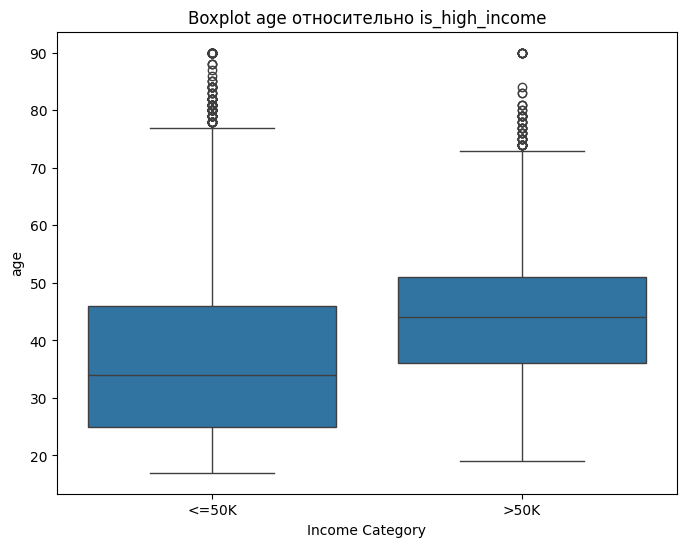

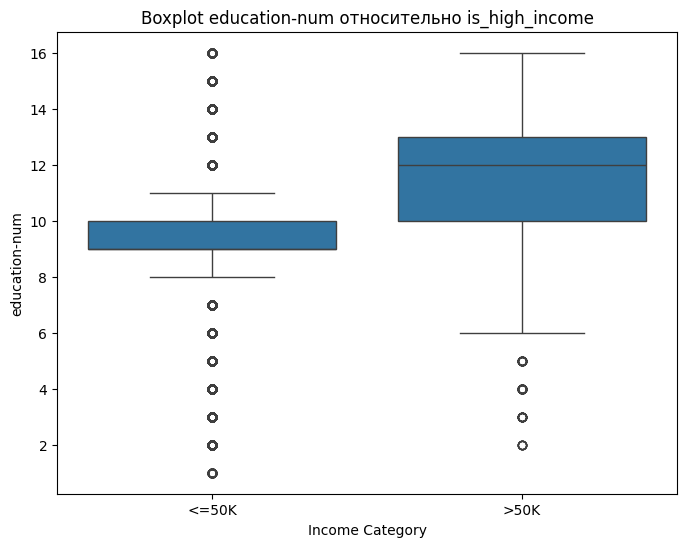

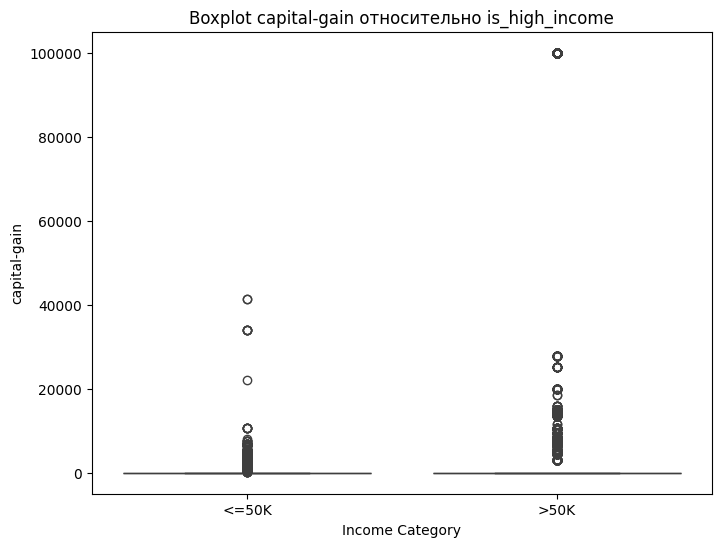

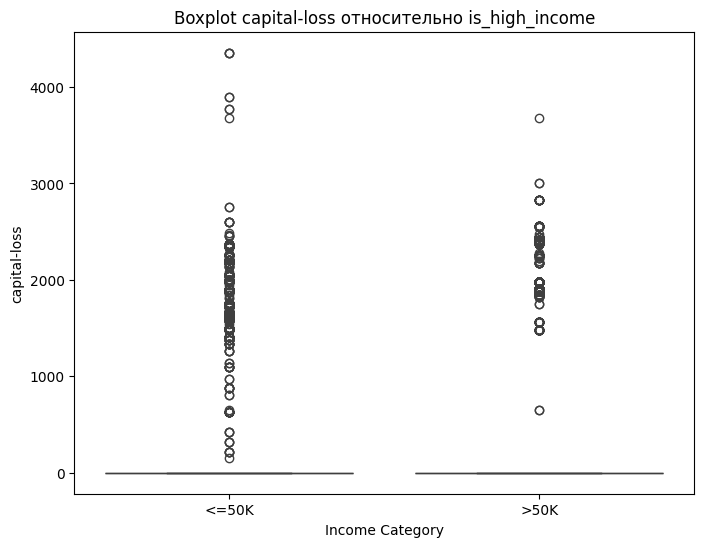

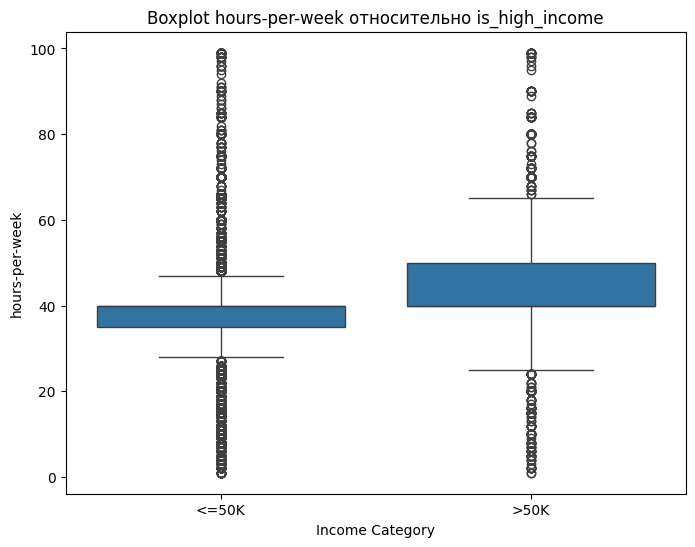

In [16]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='is_high_income', y=col, data=df)
    plt.title(f'Boxplot {col} относительно is_high_income')
    plt.xlabel('Income Category')
    plt.ylabel(col)
    plt.show()

    #видем на первой графике, чем старше человек, тем больше зарабатывает
    #видем на втором графике, чем больше образования у человека, тем больше зарабатывает
    # на третем, чем больше прирост капитала, тем больше зп
    # чем меньше зп, тем больше рисков потеря капитала может быть у таких сотрудников
    # чем больше часов в геделю, тем будет больше зп

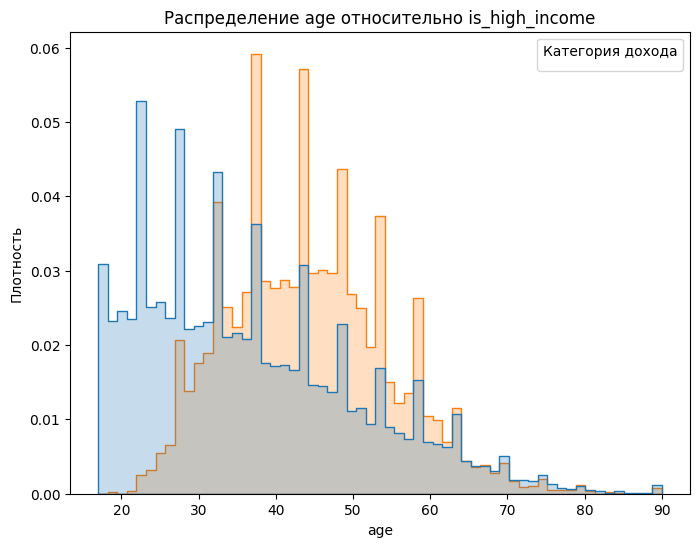

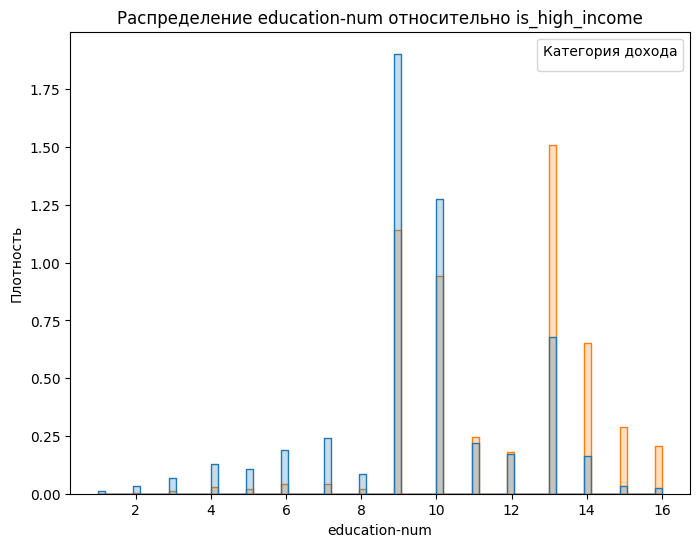

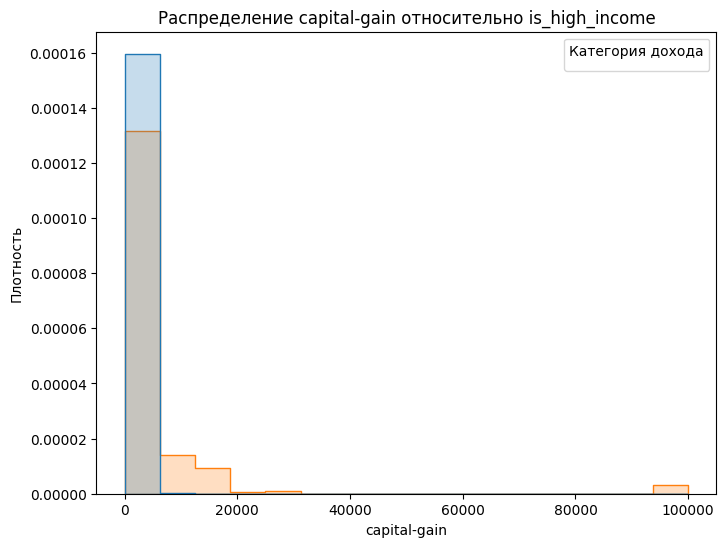

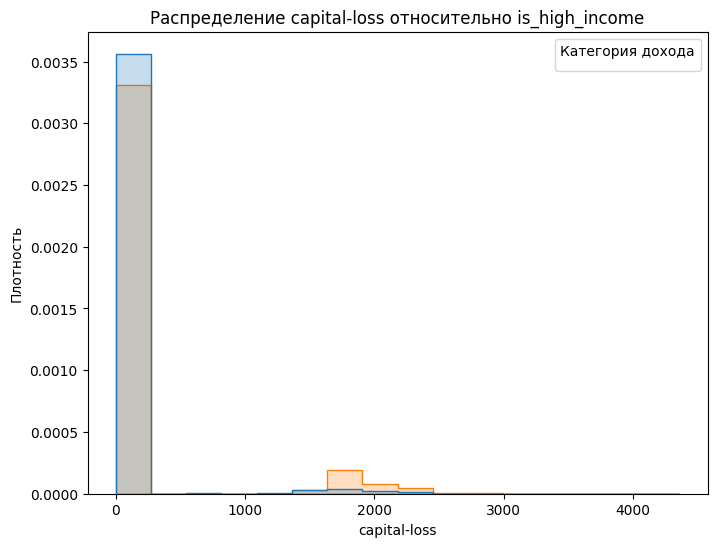

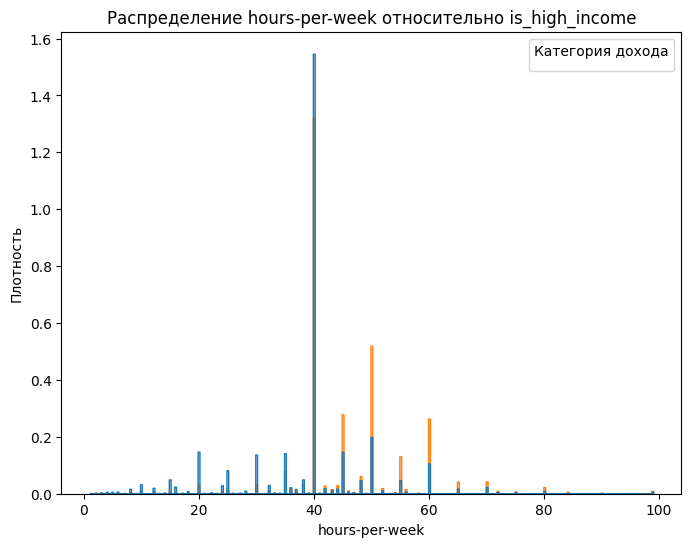

In [37]:
# Построение диаграмм распределения для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='is_high_income', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно is_high_income')
    plt.xlabel(col)
    plt.ylabel('Плотность')
    plt.legend(title='Категория дохода')
    plt.show()



⏰ проанализировать график, выделить значимые признаки относительно Y

In [18]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('is_high_income')[df.select_dtypes(include=[np.number]).columns].describe()

# Описательная статистика для категориальных переменных, разделенная по целевой переменной
desc_stats_categorical = df.groupby('is_high_income')[df.select_dtypes(include=['object']).columns].describe()


### Описание полученных результатов
⏰ ```Необходимо сделать подобное описание для своих переменных```

In [19]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('is_high_income')[col].describe())
    print("\n" + "="*50 + "\n")

Описательная статистика для age:

                  count       mean        std   min   25%   50%   75%   max
is_high_income                                                             
<=50K           24720.0  36.783738  14.020088  17.0  25.0  34.0  46.0  90.0
>50K             7841.0  44.249841  10.519028  19.0  36.0  44.0  51.0  90.0


Описательная статистика для education-num:

                  count       mean       std  min   25%   50%   75%   max
is_high_income                                                           
<=50K           24720.0   9.595065  2.436147  1.0   9.0   9.0  10.0  16.0
>50K             7841.0  11.611657  2.385129  2.0  10.0  12.0  13.0  16.0


Описательная статистика для capital-gain:

                  count         mean           std  min  25%  50%  75%  \
is_high_income                                                           
<=50K           24720.0   148.752468    963.139307  0.0  0.0  0.0  0.0   
>50K             7841.0  4006.142456  14570.378951  0

In [20]:
print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


workclass                        education                    \
                   count unique      top   freq     count unique        top   
is_high_income                                                                
<=50K              23075      8  Private  17733     24720     16    HS-grad   
>50K                7650      6  Private   4963      7841     15  Bachelors   

                     marital-status         ...   sex        native-country  \
                freq          count unique  ...   top   freq          count   
is_high_income                              ...                               
<=50K           8826          24720      7  ...  Male  15128          24283   
>50K            2221           7841      7  ...  Male   6662           7695   

                                            is_high_income                \
               unique            top   freq          count unique    top   
is_high_income                                                             
<=50K              41  United-States  21999          24720      1  <=50K   
>50K               39  United-States   7171           7841      1   >50K   

                       
                 freq  
is_high_income         
<=50K           24720  
>50K             7841  

[2 rows x 36 columns]

1. **Workclass:**

Число уникальных значений: 8
Наиболее частое значение: Private (17733 наблюдений)

Вывод: Наиболее распространённый класс работы среди людей с доходом менее 50K — это Private, что может указывать на то, что большинство людей с низким доходом работают в частном секторе.

2. **Education:**

Число уникальных значений: 16
Наиболее частое значение: HS-grad (8826 наблюдений)

Вывод: Уровень образования HS-grad (среднее образование) является самым распространенным среди людей с доходом менее 50K. Это может указывать на то, что более низкий уровень образования связан с более низкими доходами.

**3. Marital Status:**

Число уникальных значений: 7
Наиболее частое значение: Married-civ-spouse

Вывод: Люди, состоящие в браке, представляют собой значительную долю как среди тех, кто зарабатывает менее 50K, так и среди тех, кто зарабатывает более 50K. Это может указывать на то, что семейное положение не является решающим фактором для дохода.

**4. Sex:**

Число уникальных значений: 2
Наиболее частое значение: Male (15128 наблюдений для <=50K и 6662 для >50K)

Вывод: Мужчины составляют большую часть как среди людей с доходом менее 50K, так и среди тех, кто зарабатывает более 50K. Это может свидетельствовать о гендерных различиях в доходах.

**5. Native Country:**

Число уникальных значений: 41
Наиболее частое значение: United-States (21999 наблюдений для <=50K и 7171 для >50K)


**Вывод:**

Большинство людей, получающих менее 50K, являются гражданами США. Это может указывать на то, что местоположение имеет значение для дохода, и что большинство низкооплачиваемых работ находится в США.
Общий вывод:
На основе представленных данных можно сделать следующие выводы о факторах, влияющих на доход:
Работа и образование: Наличие работы в частном секторе и уровень образования (например, среднее образование) могут быть связаны с более низкими доходами.
Семейное положение: Семейное положение не показывает значительных различий между группами по доходу.
Гендерные различия: Мужчины составляют большую часть обеих групп, что может свидетельствовать о гендерных различиях в доходах.
Гражданство: Большинство людей с низким доходом являются гражданами США, что может указывать на влияние местоположения на уровень дохода.

## 2. Расчет теста Пирсона

### **Описание:**
Вы рассчитаете коэффициенты корреляции Пирсона между Y и каждым из признаков X, чтобы оценить значимость этих корреляций.

### **Шаги:**

1. **Рассчитайте коэффициенты корреляции Пирсона для каждого признака:**

In [44]:
df[df.select_dtypes(include=[np.number]).columns].corr()


,age,education-num,capital-gain,capital-loss,hours-per-week,income >50K
age,1.000000,0.036527,0.077674,0.057775,0.068756,0.234037
education-num,0.036527,1.000000,0.122630,0.079923,0.148123,0.335154
capital-gain,0.077674,0.122630,1.000000,-0.031615,0.078409,0.223329
capital-loss,0.057775,0.079923,-0.031615,1.000000,0.054256,0.150526
hours-per-week,0.068756,0.148123,0.078409,0.054256,1.000000,0.229689
income >50K,0.234037,0.335154,0.223329,0.150526,0.229689,1.000000


2. ⏰ **Интерпретируйте результаты:**


### Интерпретация:
- **Коэффициент корреляции Пирсона** показывает степень линейной связи между двумя переменными.

### Описание корреляций для значимых признаков:


1.   ***Возраст и доход (>50K) (0.234):***

Существует умеренная положительная корреляция между возрастом и вероятностью получения дохода выше 50K. Это может указывать на то, что с возрастом увеличивается вероятность получения более высокого дохода, возможно, из-за накопленного опыта и карьерного роста. Этот признак может быть важным для прогнозирования дохода.

2.  *** Уровень образования и доход (>50K) (0.335):***

Наблюдается умеренная положительная корреляция между уровнем образования (education-num) и вероятностью получения дохода выше 50K. Это свидетельствует о том, что более высокий уровень образования связан с большей вероятностью получения высокооплачиваемой работы. Этот признак имеет значительное влияние на целевую переменную и может быть полезен для предсказания дохода.



3.   ***Капитальная прибыль и доход (>50K) (0.223):***

Существует умеренная положительная корреляция между капитальной прибылью и доходом выше 50K. Это может указывать на то, что люди с более высокой капитальной прибылью чаще попадают в категорию с доходом выше 50K. Этот признак может быть полезен для анализа финансового положения индивидов.

4.   ***Часы работы в неделю и доход (>50K) (0.229):***

Умеренная положительная корреляция между количеством часов работы в неделю и вероятностью получения дохода выше 50K. Это может свидетельствовать о том, что большее количество рабочих часов связано с более высоким доходом, что может быть ожидаемым результатом.

5.  ***Уровень образования и капитальная прибыль (0.122):***

Существует слабая положительная корреляция между уровнем образования и капитальной прибылью. Это может указывать на то, что более образованные люди могут иметь больший доступ к инвестиционным возможностям, хотя связь не является сильной.

6.  ***Уровень образования и часы работы в неделю (0.148):***

Наблюдается слабая положительная корреляция между уровнем образования и количеством часов работы в неделю. Это может указывать на то, что более образованные люди могут работать больше часов или занимать более ответственные позиции, требующие большего времени.

7.   ***Капитальная прибыль и часы работы в неделю (0.078):***

Слабая положительная корреляция между капитальной прибылью и количеством рабочих часов в неделю. Это может указывать на то, что рабочие часы не обязательно влияют на капитальную прибыль, но все же существует небольшая связь.

8.   ***Капитальная потеря и доход (>50K) (0.150):***

Существует умеренная положительная корреляция между капитальной потерей и доходом выше 50K. Это может указывать на то, что люди с высокими доходами также могут сталкиваться с капитальными потерями, что является важным аспектом для анализа финансового состояния.

### Почему мультиколлинеарность это плохо?

Мультиколлинеарность возникает, когда два или более независимых признака сильно коррелируют друг с другом. Это приводит к нескольким проблемам:

1. **Переоценка значимости признаков**:
   - Когда признаки сильно коррелированы, модель может "перепутать" влияние каждого из них на целевую переменную, что приведет к ненадежным коэффициентам. Это затрудняет интерпретацию модели, поскольку сложно понять, какой из признаков действительно важен.

2. **Нестабильность модели**:
   - При наличии мультиколлинеарности небольшие изменения в данных могут привести к большим изменениям в коэффициентах модели. Это делает модель нестабильной и менее устойчивой.

3. **Затруднение выбора значимых признаков**:
   - Модель может затрудняться при выделении важности отдельных признаков, если они сильно связаны друг с другом. Это может усложнить процесс отбора признаков и снизить точность модели.

4. **Увеличение дисперсии коэффициентов**:
   - Мультиколлинеарность увеличивает дисперсию оценок коэффициентов регрессии, что делает их менее надежными. В результате, некоторые признаки могут казаться незначимыми, хотя на самом деле они играют важную роль.

## 3. Немного машинного обучения

- отберем признаки (числовые и категориальные отдельно)
- обработаем числовые и категориальыне
- обучим модель
- узнаем что влияет на Y

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [23]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object', 'int64']).columns.tolist()

print("Категориальные признаки:", categorical_features)


Категориальные признаки: ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


In [39]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True, dtype=int) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [40]:
X_processed

,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
32557,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [41]:
# Выбираем числовые признаки
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Числовые признаки:", numeric_features)

Числовые признаки: ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [42]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
if numeric_features:  # Проверяем, есть ли числовые признаки
    try:
        X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])
    except KeyError as e:
        print(f"Ошибка: {e}")
        print("Проверьте, какие колонки есть в X_processed:", X_processed.columns.tolist())
else:
    print("Нет числовых признаков для нормализации.")


Ошибка: "None of [Index(['age', 'education-num', 'capital-gain', 'capital-loss',\n       'hours-per-week'],\n      dtype='object')] are in the [columns]"
Проверьте, какие колонки есть в X_processed: ['age_18', 'age_19', 'age_20', 'age_21', 'age_22', 'age_23', 'age_24', 'age_25', 'age_26', 'age_27', 'age_28', 'age_29', 'age_30', 'age_31', 'age_32', 'age_33', 'age_34', 'age_35', 'age_36', 'age_37', 'age_38', 'age_39', 'age_40', 'age_41', 'age_42', 'age_43', 'age_44', 'age_45', 'age_46', 'age_47', 'age_48', 'age_49', 'age_50', 'age_51', 'age_52', 'age_53', 'age_54', 'age_55', 'age_56', 'age_57', 'age_58', 'age_59', 'age_60', 'age_61', 'age_62', 'age_63', 'age_64', 'age_65', 'age_66', 'age_67', 'age_68', 'age_69', 'age_70', 'age_71', 'age_72', 'age_73', 'age_74', 'age_75', 'age_76', 'age_77', 'age_78', 'age_79', 'age_80', 'age_81', 'age_82', 'age_83', 'age_84', 'age_85', 'age_86', 'age_87', 'age_88', 'age_90', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass

In [43]:
X_processed

,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
32557,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


### Шаг 3: Объяснение логистической регрессии


Логистическая регрессия — это статистический метод для анализа набора данных, в котором одна или более независимых переменных определяют исход (зависимую переменную), которая является бинарной (т.е. принимает только два возможных значения, например, 0 и 1). Целью логистической регрессии является нахождение наилучшей модели, описывающей связь между независимыми переменными и вероятностью определенного исхода.

Основные характеристики:

Функция логита (логистическая функция): Используется для моделирования вероятности принадлежности наблюдения к определенному классу.
Выводы о влиянии признаков: Коэффициенты модели показывают, как изменение признака влияет на логарифм отношения шансов.

**Функция для обучения и оценки модели**

In [29]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model


In [30]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.8742
Точность на тестовой выборке: 0.8698

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.92      4945
        >50K       0.78      0.64      0.70      1568

    accuracy                           0.87      6513
   macro avg       0.84      0.79      0.81      6513
weighted avg       0.86      0.87      0.87      6513



**Пояснение:**

- Точность (Accuracy): Доля правильных предсказаний от общего числа предсказаний.
- Precision (Точность): Доля правильных положительных предсказаний среди всех положительных предсказаний.
- Recall (Полнота): Доля правильно предсказанных положительных случаев среди всех реальных положительных случаев.
- F1-score: Гармоническое среднее между точностью и полнотой.

In [31]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])


                Feature  Coefficient
234   capital-gain_8614     4.592094
255  capital-gain_99999     4.427397
243  capital-gain_14344     4.345826
237  capital-gain_10520     4.257464
228   capital-gain_7298     4.198922
..                  ...          ...
303   capital-loss_1944     0.000000
256    capital-loss_155     0.000000
186   capital-gain_2993     0.000000
312   capital-loss_2080     0.000000
220   capital-gain_6097     0.000000

[480 rows x 2 columns]


**Пояснение:**

- Коэффициенты показывают влияние признака на вероятность принадлежности к классу 1 (лучшие вина).
- Положительный коэффициент: Увеличение признака повышает вероятность принадлежности к классу 1.
- Отрицательный коэффициент: Увеличение признака снижает вероятность принадлежности к классу 1.

## 4. Построение модели логистической регрессии для предсказания качества вина

- **Модель логистической регрессии успешно обучена для предсказания лучших вин.**
- **Точность на обучающей и тестовой выборках высока, что указывает на хорошую способность модели обобщать данные.**
- **Анализ коэффициентов показал, какие признаки наиболее влияют на качество вина:**
  - **Содержание алкоголя и сульфатов положительно влияют на качество.**
  - **Плотность и летучая кислотность отрицательно влияют на качество.**
- **Преобразование категориальных признаков и нормализация числовых признаков улучшили качество модели и упростили интерпретацию результатов.**


### 4.1 Кросс-валидация модели

In [33]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.8699
Отклонение точности: 0.0038


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

### 4.2 Построение ROC-кривой

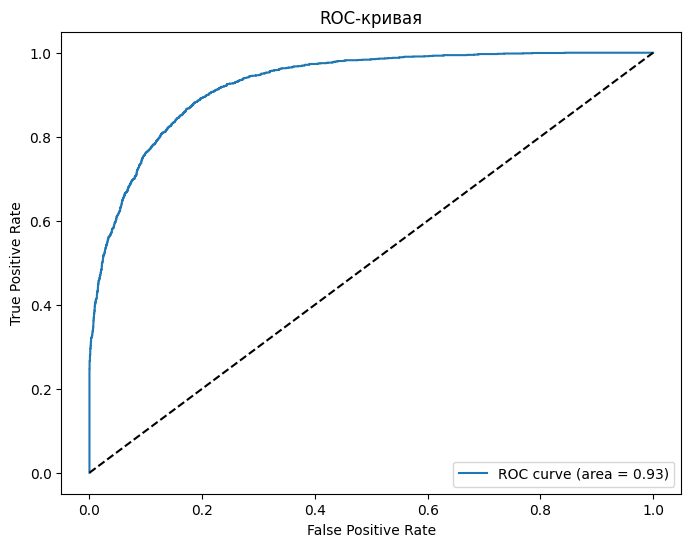

In [65]:
from sklearn.metrics import roc_curve, auc

# Предположим, Y_test содержит строковые метки
# Преобразование Y_test в бинарные значения
Y_test = np.where(Y_test == '<=50K', 0, 1)  # Заменяем '<=50K' на 0 и '>50K' на 1

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

## ⏰ Доп задание

Изучить различные метрики качества классификационных моделей и понять, в каких ситуациях они наиболее информативны.

**Метрики для исследования:**
- Accuracy (Точность)
- Precision (Точность)
- Recall (Полнота)
- F1 Score
- ROC-AUC
- Log Loss

**Попробовать другие модели и сравнить результат метрик**

**Попробовать другие методы отбора признаков**

**Использовать параметры модели и исследовать влияние на предсказание**

## Заключение

Мы успешно построили модель логистической регрессии для предсказания лучших вин на основе химических характеристик. Преобразование данных и анализ коэффициентов модели позволили нам понять влияние различных признаков на качество вина.


---

# Примечания

- **Логистическая регрессия** является мощным инструментом для бинарной классификации и позволяет интерпретировать результаты через коэффициенты модели.
- **Преобразование категориальных признаков** (One-Hot Encoding) и **нормализация числовых признаков** являются стандартными шагами предобработки данных для многих алгоритмов машинного обучения.
- **Анализ коэффициентов модели** помогает понять, какие признаки наиболее значимы и как они влияют на предсказания.

---

# Дополнительная литература

- **Логистическая регрессия:**
  - [Документация scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- **Предобработка данных:**
  - [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
  - [Min-Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- **Метрики качества модели:**
  - [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
  - [ROC-кривая и AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

---